# Homework 2: Two-layer neural network
### Due Tuesday, January 29, 2019, 5pm
#### Jesse Zhu
#### ML-W2019

Using the MNIST hand-written digits dataset, we aim to categorize the digits 0-9 with a two-layer neural network,
composed of one hidden layer and one output layer. Both layers will use the sigmoid activation function, and the
network is fully connected.

Sigmoid function: 1/ (1+ e^-z)

In [1]:
#import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#IMPORT DATA#################
testfile = "mnist_test.csv"
trainfile = "mnist_train.csv"

#Data is 785 columns by N rows. First column = Label (0-9), others = 0:255
test_data = np.genfromtxt(testfile, skip_header=True, delimiter=',')
train_data = np.genfromtxt(trainfile, skip_header=True, delimiter=',')

#PREPROCESSING###############

#SCALE to 0:1
test_data[:,1:] /= 255
train_data[:,1:] /= 255

In [79]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Accuraccy function
def acc(w1, w2, data, debug = 0):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: Percentage of correct classifications, where a classification is taken using the highest perceptron
        output value
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1) #Append 1s for bias & strip label from data[]
    h_act = np.array(list(map(sigmoid, xi @ w1[:, :]))) #N by (hidden_units)
    hi = np.append(np.ones([length,1]), h_act[:,:],1) #N by (hidden_units+1)

    o_act = np.array(list(map(sigmoid, hi @ w2[:, :]))) #N by 10

    amax = o_act.argmax(axis=1) #Predicted value
    if debug:
        print(o_act.shape)
        print(amax[0:25])
    ret = np.sum(amax == data[:,0])
    return ret/length

#Confusion matrix
def cm(w1,w2, data):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: confusion matrix 11x11 including labels (actual vs predicted)
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1) #Append 1s for bias & strip label from data[]
    h_act = np.array(list(map(sigmoid, xi @ w1[:, :]))) #N by (hidden_units)
    hi = np.append(np.ones([length,1]), h_act[:,:],1) #N by (hidden_units+1)
#sigmoid
    o_act = np.array(list(map(sigmoid, hi @ w2[:, :]))) #N by 10
    #o_act= hi @ w2[:, :]
    #print(o_act[0:3,:])
    
    m = np.zeros([11,11])
    m[0,1:] = np.arange(10)
    m[1:,0] = np.arange(10)
    
    for i in range(0, length):
        actual = int(data[i, 0])
        predic = int((o_act[i,:]).argmax(axis=0))
        m[actual+1, predic+1] += 1
        
    return m.astype(int)

#Training through back-propagation
def train(w1, w2, data, lr, m, debug = 0):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
        lr: learning rate, (0:1)
        m: momentum, (0:1)
    output: Altered input weight matricies
    """
    length = len(data[:,0])
    oh_deltas_prev = np.zeros(w2.shape) #initialize previous weights to 0 (momentum calculations)
    hi_deltas_prev = np.zeros(w1.shape)

    for i in range(0,length):
        #Forward Prop
        xi = np.append([1], data[i, 1:]) #add "1" to input beginning for offset -> 1x785
        hidden = np.array(list(map(sigmoid, xi @ w1[:, :]))) #1 by (hidden_units)
        hi = np.append([1], hidden) #1 by (hidden_units+1)
        #out = np.array(list(map(sigmoid, hi @ w2[:, :]))) #1 by 10
        out = np.array(list(map(sigmoid, np.dot(hi,w2[:, :])))) #1 by 10
        
        target = np.full((10),0.1)
        tindex = int(data[i,0])
        target[tindex] = 0.9 #1x10 of 0s, with target = 0.9, else 0.1
        #Error
        err_o = out * (1-out) *(target-out) #1 by 10 array, output error
        #err_h = hidden * (1-hidden) * (w2[1:,:]@err_o) #hu by 1 array, hidden error
        err_h = hidden * (1-hidden) * np.dot(w2[1:,:],err_o) #hu by 1 array, hidden error
        
        #Backpropagation Deltas
        oh_deltas = lr * np.outer(hi, err_o) +m*oh_deltas_prev #(hu+1) by 10
        hi_deltas = lr * np.outer(xi, err_h) +m*hi_deltas_prev #785 by hu
        oh_deltas_prev = oh_deltas
        hi_deltas_prev = hi_deltas
        #Update weights
        w2 += oh_deltas
        w1 += hi_deltas
    return

***# Hidden =  10 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  932    0    4    2    6    1   11    9   15    0]
 [   1    0 1102    2    5    0    2    3    3   18    0]
 [   2   11    1  919   12    9    1    9   18   48    4]
 [   3    8    0   19  905    0   23    2   14   32    7]
 [   4    0    1    2    0  913    0   12    2   11   41]
 [   5   13    1    9   38   12  690   26    6   82   15]
 [   6   11    3   13    0    9    0  891    2   29    0]
 [   7    1    4   12    6    8    1    1  918   30   46]
 [   8    8    4    8   12    3    7   12    6  904   10]
 [   9    4    1    0   14   27    5    2   12   21  923]]
final test acc =  0.9097909790979097
final train acc =  0.9185486424773747


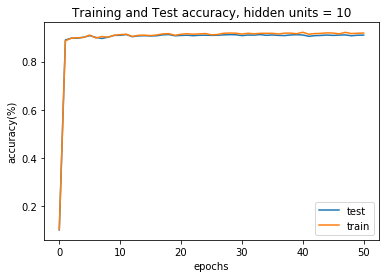

***# Hidden =  20 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  960    0    1    1    0    5    5    4    4    0]
 [   1    0 1113    4    3    0    1    2    0   11    1]
 [   2    6    3  955    3   10    0    9   11   31    4]
 [   3    5    1   12  929    0   26    1    5   25    6]
 [   4    1    1    5    1  888    0   17    2   10   57]
 [   5    7    2    6   23    1  806   12    7   24    4]
 [   6   16    3   14    1    8   14  890    1    9    2]
 [   7    0    9   19    7    0    1    0  956   10   25]
 [   8    8    7    2    8    3   10    8    2  917    9]
 [   9    6    5    1   10   14    7    0    6   18  942]]
final test acc =  0.9356935693569357
final train acc =  0.9551492524875415


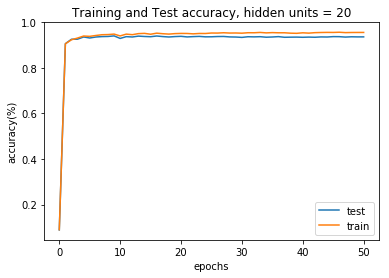

***# Hidden =  100 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  970    0    4    0    0    0    1    1    3    1]
 [   1    1 1120    1    4    1    1    2    0    5    0]
 [   2    5    2  986    8    1    1    6    5   15    3]
 [   3    0    1    7  969    0   13    0    5   10    5]
 [   4    2    0    2    0  943    0    6    1    2   26]
 [   5    4    1    1    7    0  855    6    4    7    7]
 [   6    8    3    1    1    2   13  925    0    5    0]
 [   7    0    3   13    2    4    0    0  977   12   16]
 [   8    7    3    2    1    4    6    5    3  940    3]
 [   9    5    3    0   10   11    2    1    5    6  966]]
final test acc =  0.9651965196519652
final train acc =  0.9938332305538425


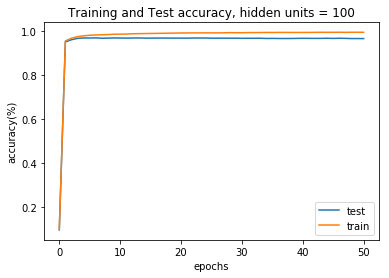

In [88]:
################# EXPERIMENT 1 ####################

epochs = 50
learning_rate = 0.1
momentum = 0.9
hidden_units = [10, 20, 100]


for hu in hidden_units:
    print("***# Hidden = ",hu,"***************")
    w_hi = (np.random.rand(785,hu) * 0.10) - 0.05 #weights, input to hidden
    w_oh = (np.random.rand(hu+1,10) * 0.10) - 0.05 #weights, hidden to output
    acc_test = []
    acc_train = []

    acc_test.append(acc(w_hi, w_oh,test_data)) #initial accuracy values
    acc_train.append(acc(w_hi, w_oh,train_data))
    
    for i in range(0,epochs):
        train(w_hi, w_oh, train_data, learning_rate, momentum)
        acc_test.append(acc(w_hi, w_oh,test_data))
        acc_train.append(acc(w_hi, w_oh,train_data))
        print(i, end='', flush=True)
    print(" ") #newline
    
    print(cm(w_hi, w_oh, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, hidden units = " + str(hu)
    plt.title(title)
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

***# Momentum =  0 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  971    0    0    2    0    1    2    1    2    1]
 [   1    0 1124    1    2    0    1    3    2    2    0]
 [   2    3    4 1007    3    1    0    4    5    4    1]
 [   3    0    0    1  993    0    6    1    3    2    4]
 [   4    2    0    0    0  961    0    6    0    1   12]
 [   5    4    0    0   10    0  864    4    1    5    4]
 [   6    7    3    1    0    2    4  939    0    2    0]
 [   7    1    4   12    3    3    0    0  993    2    9]
 [   8    3    1    2    2    4    2    3    3  952    2]
 [   9    2    6    0    8    8    0    1    5    3  976]]
final test acc =  0.978097809780978
final train acc =  0.9952832547209121


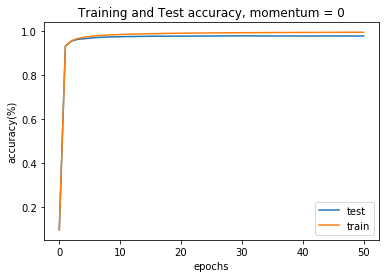

***# Momentum =  0.5 ***************
01234567891011121314151617181920212223242526272829303132333435

In [ ]:
################# EXPERIMENT 2 ####################

epochs = 50
learning_rate = 0.1
momentums = [0, 0.5, 1] #VARY MOMENTUM
hu = 100


for momentum in momentums:
    print("***# Momentum = ",momentum,"***************")
    w_hi = (np.random.rand(785,hu) * 0.10) - 0.05 #weights, input to hidden
    w_oh = (np.random.rand(hu+1,10) * 0.10) - 0.05 #weights, hidden to output
    acc_test = []
    acc_train = []

    acc_test.append(acc(w_hi, w_oh,test_data)) #initial accuracy values
    acc_train.append(acc(w_hi, w_oh,train_data))
    
    for i in range(0,epochs):
        train(w_hi, w_oh, train_data, learning_rate, momentum)
        acc_test.append(acc(w_hi, w_oh,test_data))
        acc_train.append(acc(w_hi, w_oh,train_data))
        print(i, end='', flush=True)
    print(" ") #newline
    
    print(cm(w_hi, w_oh, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, momentum = " + str(momentum)
    plt.title(title)
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

In [ ]:
################# EXPERIMENT 3 ####################

epochs = 50
learning_rate = 0.1
momentum = 0.9
hu = 100
data_frac = [0.25, 0.5] #Using a quarter, then a half of the training data
length = len(train_data)

for frac in data_frac:
    ind = int(length*frac) #number of examples in subset of training data
    part_data = train_data[0:ind,:]
    print("***Fraction of total data = ",frac,"***************")
    w_hi = (np.random.rand(785,hu) * 0.10) - 0.05 #weights, input to hidden
    w_oh = (np.random.rand(hu+1,10) * 0.10) - 0.05 #weights, hidden to output
    acc_test = []
    acc_train = []

    acc_test.append(acc(w_hi, w_oh,test_data)) #initial accuracy values
    acc_train.append(acc(w_hi, w_oh,part_data))
    
    for i in range(0,epochs):
        train(w_hi, w_oh, train_data, learning_rate, momentum)
        acc_test.append(acc(w_hi, w_oh,test_data))
        acc_train.append(acc(w_hi, w_oh,part_data))
        print(i, end='', flush=True)
    print(" ") #newline
    
    print(cm(w_hi, w_oh, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, fraction of data = " + str(frac)
    plt.title(title)
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

In [78]:
test1 = np.zeros(5)
test2 = np.append(1, test1)
print(list(map(sigmoid,[0.1, 0.2, 0.3, 0.4, 0.8, 0.9])))
t3 = np.full((10),0.1)
print(1-t3)
t1 = np.array([1,2, 3])
t2 = np.array([2,5, 10])
print("multiply")
print(t1*t2)
print(np.multiply(t1,t2))
print(np.multiply(t1,5))

t4 = np.array([[2,3,4],[1,1,1]])
t5= np.ones([3])
print(t4)
print(t5)
print(t4@t5)
print(np.zeros(t4.shape))

[0.52497918747894, 0.549833997312478, 0.574442516811659, 0.598687660112452, 0.6899744811276125, 0.7109495026250039]
[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
multiply
[ 2 10 30]
[ 2 10 30]
[ 5 10 15]
[[2 3 4]
 [1 1 1]]
[1. 1. 1.]
[9. 3.]
[[0. 0. 0.]
 [0. 0. 0.]]


In [87]:
import time
test1 = np.ones([5000,5000])

start = time.time()
test2 = test1*5
end = time.time()
print(end-start)

start = time.time()
test3 = np.multiply(5,test1)
end = time.time()
print(end-start)

0.2863738536834717
0.2995340824127197
